Analitika Media Sosial Buku Praktek 01-01
==============

***Petunjuk Mengambil data dari Twitter: USER***

**Author:** *Dr. Eng. Farrikh Alzami, M.Kom*

Program Studi Sistem Informasi S1

***Universitas Dian Nuswantoro 2021***

---

MATERI: **MENGAMBIL DATA DARI USER ID**

---

# Table of Contents
- [load libraries](#load-libraries)
- [buat akun](#Buat-akun-di-Twitter)
- [login credentials](#Login-Credentials-twitter)
- [ambil tweets dari username](#ambil-tweets-dari-username)
- [memasukkan ke dataframe pandas](#memasukkan-ke-dataframe-pandas)
- [cek internal tweet](#cek-internal-tweets)
- [tambah informasi relevan](#tambahkan-informasi-relevan)
- [visualisasi dan statistik](#Visualisasi-dan-statistik-dasar)
- [simpan csv](#simpan-csv)

# load libraries

In [1]:
import pandas as pd
import time
import tweepy
import numpy as np

# Buat akun di Twitter
- masuk ke https://developer.twitter.com/en/portal/dashboard

![homepage](img/01.png)

- buat Project 01: **CREATE PROJECT** > 

![create project](img/02.png)

- silakan pilih: **student** atau **doing research** >  

![create project](img/03.png)

- describe **silakan tulis sendiri**

![create project](img/04.png)

- Buat Project App > nama phase

![create project](img/05.png)

- **LANGSUNG MASUK KE GO TO DASHBOARD SAJA**

![create project](img/06.png)

- aplikasi sudah siap

![create project](img/07.png)

# Login Credentials twitter

## cek login

BUKA TOMBOL KUNCI

![create project](img/08.png)

masuk ke **keys and tokens** > Consumer Keys > API Key and Secret, lalu masukkan

`auth = tweepy.OAuthHandler("API KEY", "API KEY SECRET")`

masuk ke **keys and tokens** > Authentication Tokens > Access token & secret, lalu masukkan

`auth.set_access_token("ACCESS TOKEN", 
    "ACCESS TOKEN SECRET")`

![Developer Twitter](img/dev_twitter.png)

In [2]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("6VBNexMOH2tClDFMLxPtEF4BC",
    "dGebFuLhVhZNxwXz4nACb0L4WNhTdjYqDJU4wfkwTPgCfovjVL")
    auth.set_access_token("153745937-RopdwO7IoWsT0LNnwzCafAdLvXMPiswCY8brbsua",
    "kZ5U8WJmSLL2EtoskMxWgFOWuGnXf9IL8ZGPZ8MiBoUlm")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [3]:
# buat extractor object
extractor = twitter_config()

Authentication OK


# ambil tweets dari username

In [6]:

tweets = extractor.user_timeline(screen_name="KemenkesRI", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 200.

5 tweet teratas:

Update perkembangan vaksinasi COVID-19 di Indonesia, per tanggal 16 April 2021 pukul 09.00 WIB.

#VaksinasiNasional https://t.co/bWcnJVUov9

Meski udah disuntik vaksin, selalu ingat untuk tetap disiplin menerapkan protokol kesehatan di mana pun &amp; kapan pun… https://t.co/Vjyw7Nl8ZX

Jadi kamu masih bisa mengajak orang tua (lansia) ke sentra vaksinasi terdekat di kotamu untuk mendapatkan divaksina… https://t.co/A1eZS9Yka8

Tahukah kamu❓

Vaksinasi selama bulan puasa tetap berjalan seperti biasanya lho.
Ini sesuai Fatwa MUI bahwa vaksina… https://t.co/120VDdJqwB

Pagi #Healthies!

Puasa bukan berarti absen olahraga lho. Simak yuk #SehatWicara “Latihan Fisik Selama Berpuasa" be… https://t.co/rKuVoonWGy



# memasukkan ke dataframe pandas

In [7]:
# Kita dapat membuat kerangka data sebagai berikut:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(10))

,Tweets
0,Update perkembangan vaksinasi COVID-19 di Indo...
1,"Meski udah disuntik vaksin, selalu ingat untuk..."
2,Jadi kamu masih bisa mengajak orang tua (lansi...
3,Tahukah kamu❓\n\nVaksinasi selama bulan puasa ...
4,Pagi #Healthies!\n\nPuasa bukan berarti absen ...
5,3. Menggunakan 3 metode pemeriksaan yakni RT-P...
6,"2. Dengan demikian, terjadi penambahan kasus p..."
7,1. Akumulasi kasus terkonfirmasi positif #COVI...
8,Update situasi terkini perkembangan #COVID19 d...
9,Update perkembangan vaksinasi COVID-19 di Indo...


# cek internal tweets

Sesuatu yang menarik adalah jumlah metode internal yang dimiliki struktur tweet di Tweepy:

In [8]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'extended_entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Dari sini menarik bahwa, jika kita ingin mendapatkan data seperti tanggal pembuatan tweet atau perangkat yang membuatnya, kita dapat mengakses informasi ini dengan metode yang muncul di daftar ini. Contohnya adalah sebagai berikut:

In [9]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1382899793786142722
2021-04-16 03:32:58
Twitter for iPhone
13
5
None
None
{'hashtags': [{'text': 'VaksinasiNasional', 'indices': [97, 115]}], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 1382899784487342087, 'id_str': '1382899784487342087', 'indices': [116, 139], 'media_url': 'http://pbs.twimg.com/media/EzEMBu5VEAc54df.jpg', 'media_url_https': 'https://pbs.twimg.com/media/EzEMBu5VEAc54df.jpg', 'url': 'https://t.co/bWcnJVUov9', 'display_url': 'pic.twitter.com/bWcnJVUov9', 'expanded_url': 'https://twitter.com/KemenkesRI/status/1382899793786142722/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 675, 'h': 1200, 'resize': 'fit'}, 'small': {'w': 383, 'h': 680, 'resize': 'fit'}, 'large': {'w': 720, 'h': 1280, 'resize': 'fit'}}}]}


# tambahkan informasi relevan

Kami menambahkan informasi yang relevan

In [10]:
dataset['len'] = np.array([len(tweet.text) for tweet in tweets])
dataset['ID']  = np.array([tweet.id for tweet in tweets])
dataset['Created'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets])
dataset['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [11]:
dataset.head()

,Tweets,len,ID,Created,Source,Likes,RTs
0,Update perkembangan vaksinasi COVID-19 di Indo...,139,1382899793786142722,2021-04-16 03:32:58,Twitter for iPhone,13,5
1,"Meski udah disuntik vaksin, selalu ingat untuk...",144,1382888474710188033,2021-04-16 02:47:59,Twitter for iPhone,2,0
2,Jadi kamu masih bisa mengajak orang tua (lansi...,140,1382887876023619586,2021-04-16 02:45:37,Twitter for iPhone,4,0
3,Tahukah kamu❓\n\nVaksinasi selama bulan puasa ...,140,1382887530274516997,2021-04-16 02:44:14,Twitter for iPhone,23,3
4,Pagi #Healthies!\n\nPuasa bukan berarti absen ...,140,1382862356854689795,2021-04-16 01:04:12,Twitter for iPhone,9,2


# Visualisasi dan statistik dasar
## Rata-rata dan popularitas
Pertama, kami tertarik untuk mengetahui statistik dasar tentang informasi yang kami ekstrak, seperti rata-rata panjang setiap tweet, yang merupakan tweet dengan paling favorit, mana yang paling banyak di-retweet tweet, dll.

In [12]:
# extract rata-rata:
media = np.mean(dataset['len'])

print("Jumlah rata-rata karakter di tweet: {}".format(media))

Jumlah rata-rata karakter di tweet: 137.37


In [13]:
# Kami mengekstrak tweet dengan FAV paling banyak dan dengan RT terbanyak:

fav_max = np.max(dataset['Likes'])
rt_max  = np.max(dataset['RTs'])

fav = dataset[dataset.Likes == fav_max].index[0]
rt  = dataset[dataset.RTs == rt_max].index[0]

# Max FAVs:
print("Tweet yang paling banyak disukai adalah: \n{}".format(dataset['Tweets'][fav]))
print("Jumlah suka: {}".format(fav_max))
print("{} Characters.\n".format(dataset['len'][fav]))


Tweet yang paling banyak disukai adalah: 
Selama bulan Ramadhan, @KemenkesRI tetap akan menjalankan vaksinasi COVID-19. Ini sejalan dengan Fatwa MUI bahwa va… https://t.co/olJC14oODx
Jumlah suka: 156
140 Characters.



In [14]:
# Max RTs:
print("Tweet dengan retweet terbanyak adalah: \n{}".format(dataset['Tweets'][rt]))
print("Jumlah retweet: {}".format(rt_max))
print("{} Characters.\n".format(dataset['len'][rt]))

Tweet dengan retweet terbanyak adalah: 
RT @BudiGSadikin: @AikHoki @prastow @BPKPgoid @bpkri @pramonoanung @TarunaIkrar @PBIDI @jokowi Insya Allah insentif nakes akan mulai dibaya…
Jumlah retweet: 196
140 Characters.



# Deret waktu

Karena kita memiliki seluruh vektor tanggal pembuatan, kita dapat membuat deret waktu sehubungan dengan panjang tweet, favorit, dan retweet.

In [15]:
tlen = pd.Series(data=dataset['len'].values, index=dataset['Created'])
tfav = pd.Series(data=dataset['Likes'].values, index=dataset['Created'])
tret = pd.Series(data=dataset['RTs'].values, index=dataset['Created'])

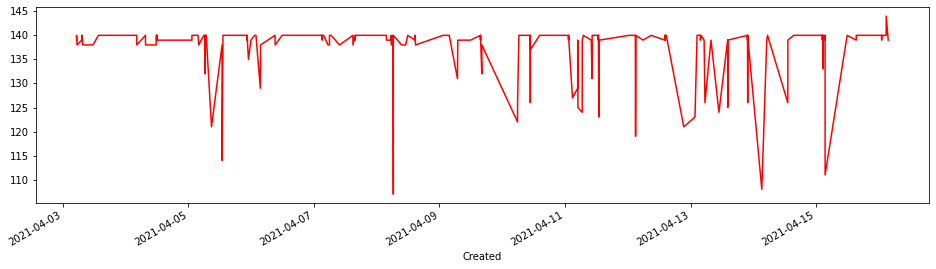

In [16]:
tlen.plot(figsize=(16,4), color='r');

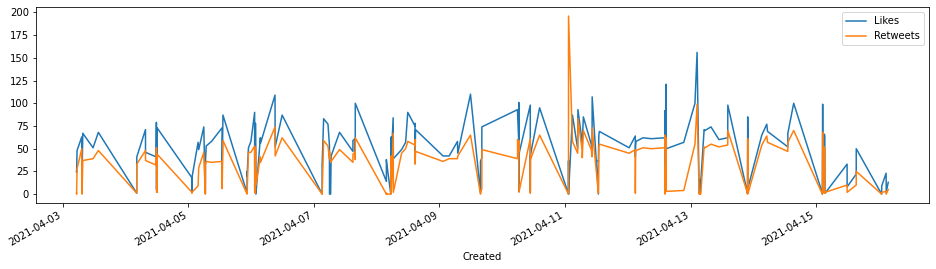

In [17]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

# Bagan pai perangkat
Kami membersihkan sumber pembuatan tweet untuk membuat diagram lingkaran:

In [18]:
sources = []
for source in dataset['Source']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* Twitter for iPhone
* Twitter Web App


## Kami menghitung perangkat dan membuat diagram lingkaran:

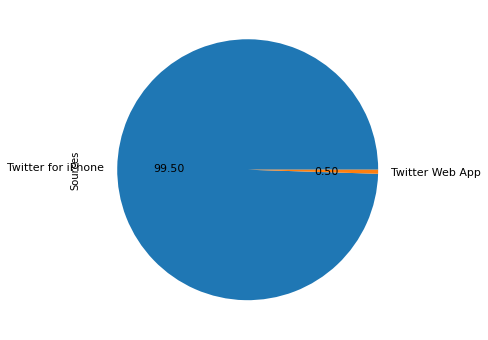

In [19]:
percent = np.zeros(len(sources))

for source in dataset['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

# simpan csv

In [20]:
dataset.to_csv('dataset_user.csv',sep=';')